In [7]:
# I listened to this
# https://dataskeptic.com/blog/episodes/2022/matrix-profiles-in-stumpy
# just for a fun time series, let's try stock prices
# https://towardsdatascience.com/best-5-free-stock-market-apis-in-2019-ad91dddec984

In [8]:
import yfinance as yf
import stumpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle

In [9]:
msft = yf.Ticker("CAT")

In [10]:
print(msft)

yfinance.Ticker object <CAT>


In [11]:
# msft.info

In [12]:
x = msft.history(start = "2020-1-1", end= '2022-1-1')

In [13]:
x

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,141.682908,143.156794,140.712994,143.137772,3311900,0.0,0
2020-01-03,141.464187,142.595750,140.209002,141.150391,3100600,0.0,0
2020-01-06,140.037851,141.264495,139.343690,141.055298,2549600,0.0,0
2020-01-07,140.113956,140.323153,138.364303,139.191589,2841900,0.0,0
2020-01-08,139.619470,141.274027,139.267644,140.427719,2153200,0.0,0
...,...,...,...,...,...,...,...
2021-12-27,205.940002,206.899994,205.139999,206.380005,1711200,0.0,0
2021-12-28,206.179993,208.259995,206.139999,206.619995,1393000,0.0,0
2021-12-29,206.270004,208.550003,206.080002,207.330002,1334900,0.0,0


In [14]:
#  https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html
m= 20
mp = stumpy.stump(x['Close'], m)

In [15]:
mp.shape

(486, 4)

In [16]:
motif_idx = np.argsort(mp[:, 0])[0]

In [17]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 3


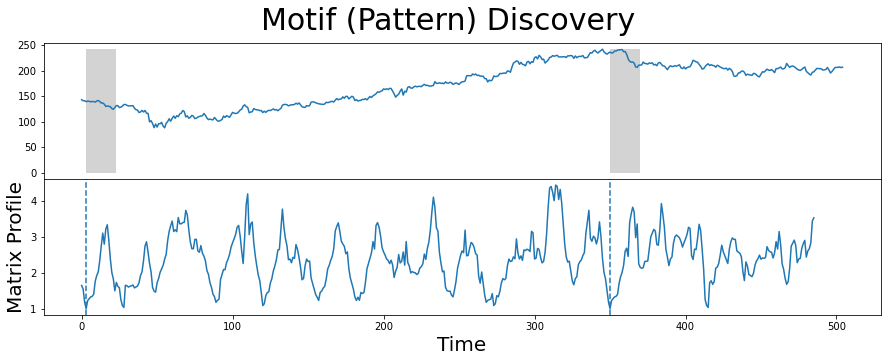

In [18]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(x['Close'].values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = x['Close'].max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()



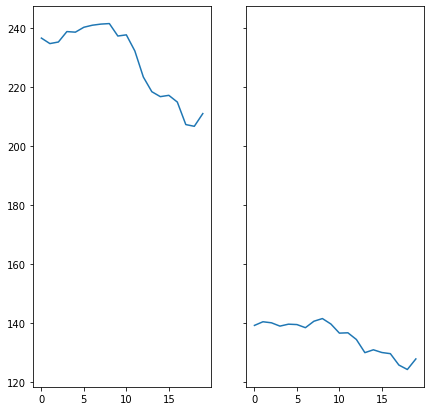

In [19]:
fig, ax = plt.subplots(1,2, figsize = (7,7), sharey=True)

values = x['Close'].values
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

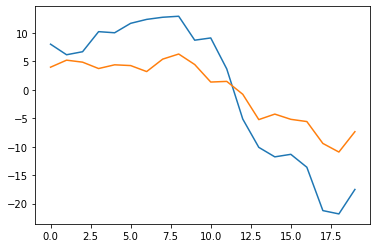

In [20]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')

# Try weather data. 
* Tutorial on getting data https://towardsdatascience.com/obtain-historical-weather-forecast-data-in-csv-format-using-python-5a6c090fc828
* basically using this lib . https://github.com/ekapope/WorldWeatherOnline
* 

In [21]:
from wwo_hist import retrieve_hist_data
import os

In [22]:
def get_api_key():
    with open("apikey.txt", 'r') as f:
        return f.readline().strip("\n")

In [23]:
api_key = get_api_key()

In [24]:
# key

In [25]:
frequency=24
start_date = '1-1-2018'
end_date = '1-1-2022'
# api_key = 
location_list = ['albuquerque','santa_fe']

if False:
    hist_weather_data = retrieve_hist_data(api_key,
                                    location_list,
                                    start_date,
                                    end_date,
                                    frequency,
                                    location_label = False,
                                    export_csv = True,
                                    store_df = True)

In [26]:
abq = pd.read_csv("albuquerque.csv")

In [35]:
abq.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2018-01-01,9,-3,0.0,8.7,2,94,05:05 PM,06:35 AM,07:15 AM,...,15,20,36,0.0,1024,9,10,149,8,albuquerque
1,2018-01-02,11,1,0.0,8.7,3,100,06:11 PM,07:38 AM,07:15 AM,...,15,1,35,0.0,1023,11,10,298,10,albuquerque
2,2018-01-03,10,-1,0.0,8.7,2,92,07:20 PM,08:35 AM,07:15 AM,...,10,36,32,0.0,1025,10,10,203,6,albuquerque
3,2018-01-04,11,0,0.0,8.7,3,85,08:28 PM,09:25 AM,07:15 AM,...,7,6,22,0.0,1021,11,10,224,3,albuquerque
4,2018-01-05,11,1,0.0,7.0,2,78,09:36 PM,10:08 AM,07:16 AM,...,8,19,26,0.0,1023,11,10,292,4,albuquerque


## apply stumpy to the abq temp
* 7 day window. 

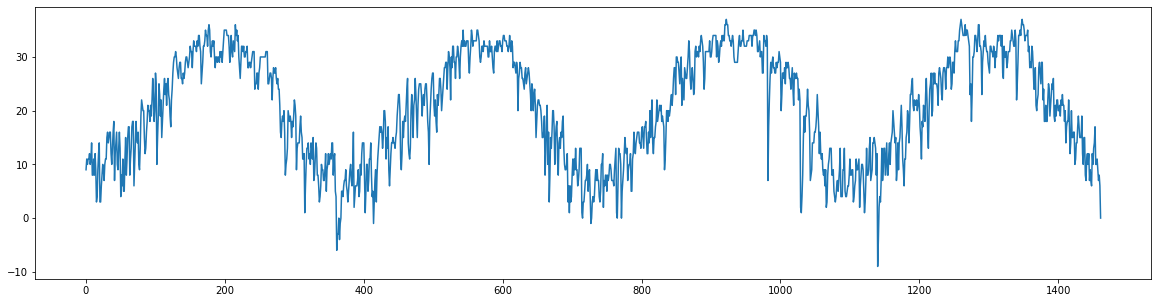

In [28]:
# plotting the date on the x axis is slow
plt.figure(figsize = (20,5))
values = abq['maxtempC'].values
values = values.astype(np.float)
plt.plot(values)

In [36]:
m= 30
mp = stumpy.stump(values, m)

In [37]:
motif_idx = np.argsort(mp[:, 0])[0]

In [38]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 601


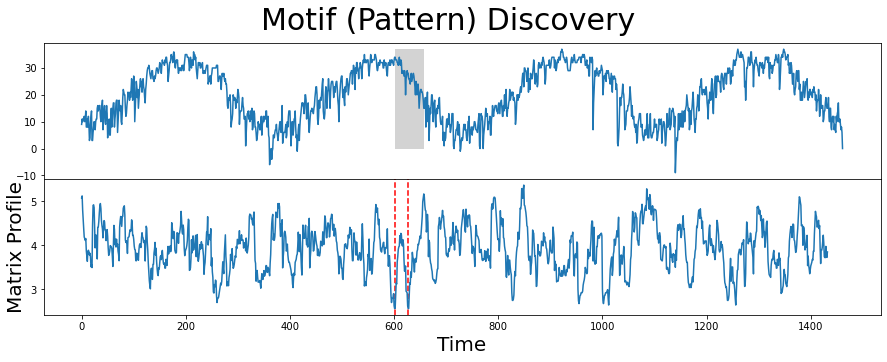

In [39]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = values.max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed", color = 'red')
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed", color = 'red')
axs[1].plot(mp[:, 0])
plt.show()



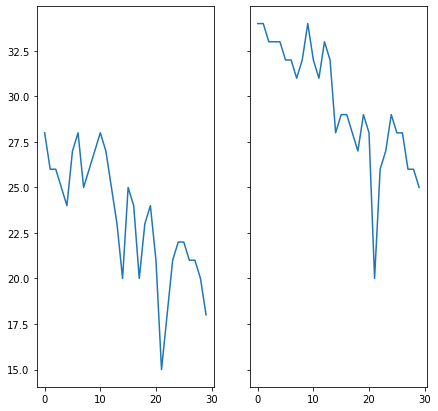

In [40]:
fig, ax = plt.subplots(1,2, figsize = (7,7), sharey=True)

# values = x['Close'].values
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

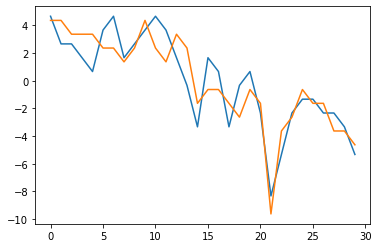

In [41]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')